# Visualizations with Pandas

# 1. Introduction

Pandas library will probably be your first option to create visual insights to understand the data more. 

The main advantage is that you can visualize the data using simple and straightforward methods. This is due the fact, that behind the scene, there is another library and so Matplotlib library. But don't worry about this library as we will cover it in the latter lesson. So when we call some Pandas´s plotting function, Matplotlib simply function as an engine. Therefore we can use higher level of code to gain similar good-looking plots as in Matplotlib.

# 2. Dataset

We will be wroking with occupancy detection dataset, that can be found [here](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#). 

This dataset is intended to solve binary classification problems according to attributes which could indicate whether a person is present in the room or not.

Let´s import Pandas library and load the data.

In [120]:
# Import Pandas library
import pandas as pd
# For now, we use Matplotlib only to set the size of plots
import matplotlib.pyplot as plt
# rcParams allow us to set the size blobal to the whole notebook 
plt.rcParams['figure.figsize'] = [10,6]
# In some plots, we define the size within the plotting function

In [65]:
# Load the data
data = pd.read_csv('Datasets/room_occupancy.txt')

In [71]:
# Take a look at the first 10 rows
data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


## 2.1 Attributes explanation

Firstly, let's examine what variables we are dealing with.

- date: the specific day and time when the values were recorded 
- Temperature: measured in Celsius
- Humidity: relative humidity - a present state of absolute humidity relative to a
    maximum humidity given the same temperature expressed as a          percentage
- Light: in Lux unit
- CO2: in ppm unit (parts per million)
- HumidityRatio: derived quantity from temperature and relative humidity, expressed in kilograms of water vapor per kilogram of dry air  
- Occupancy: 
the presence of a person in the room: the occupancy of the room was obtained from pictures that were taken every minute for a period of 8 days (1 if a person is present, 0 otherwise)


### 2.1.2 Variables
Let´s look at the variables data type using `.dtypes` attribute.

In [28]:
# Check variables data type
data.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

There are 6 numerical variables in the dataset. Almost all of the variables have been correctly read, except 'date' variable, which Python recognized as an object. Convert this object datatype to datetime datatype using `Pandas`. 

In [29]:
# Convert date variable using Pandas to_datetime method
data['date'] = pd.to_datetime(data['date'])

Let´s check whether there are some missing values that we need to be aware of. 

In [30]:
# Check missing values
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Alright, there are no missing values in the DataFrame, so that we can proceed to explore a little bit the data.

In [75]:
# Print number of rows and columns
data.shape

(9752, 7)

In [70]:
# Explore descriptive statistics
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


# 3. Plot method

We can use a `.plot()` function. This plotting function is simply a wrapper around `Matplotlibs` plot function that create **a lineplot** by default. A lineplot plots each data point of DataFrame and then draw a straight continuous line connecting these values.

---

If you call `.plot()` right onto the DataFrame, all of the variables will be plotted. This approach is sometimes not quite good as you can see below. There are several variables with similar low values, thus they are overlapping. 

<AxesSubplot:>

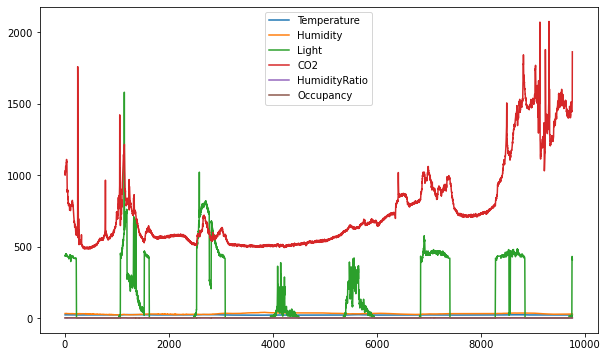

In [121]:
# Create a lineplot of DataFrame
data.plot()

Let´s create a violet line plot of variable 'Temperature'. You can select desired variable by indexing the DataFrame with square brackets. 

<AxesSubplot:>

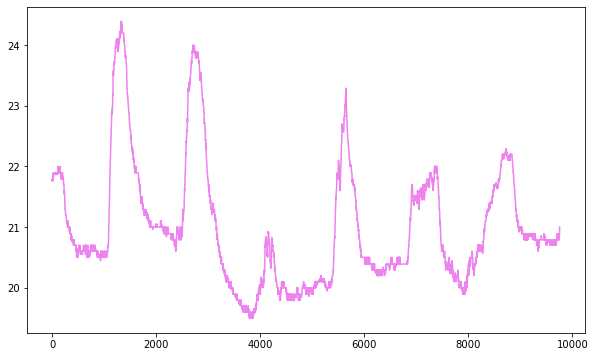

In [122]:
# Create a line plot of Temperature variable 
data['Temperature'].plot(color = 'violet')

Now we can see plotted only Temperature variable with respective values.  

You can see that `plot()` function returns ```<AxesSubplot:>``` object. But what does it mean? 

For now, remember that each graph is actually represented as a Figure object that serves as the base. Onto this bse, there is Axes object in which are x-axis and y-axis created. In the latter section, we´ll discuss more details about Figures and Axes. 
To avoid displaying this label, you can put a semicolon at the end of the line.

---
It is also posible to plot multiple columns by passing a **list** of respective variables, separated by a comma within square brackets and then call `.plot()`. `Pandas` set the colors of lines automatically and so you will be able to distinguish the variables. You can specify colors of lines to `color` parameter if you want to. Chosen colors need to passed in the dictionary.  See the following example:

``` data[['variable_1', 'variable_2']].plot(color = {'variable_1':'yellow', 'variable_2': 'black'})```

Also the legend is placed by default. 

**Try it yourself in the following task.**

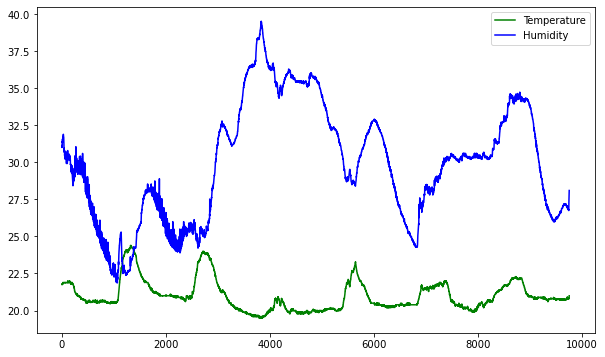

In [139]:
# TASK 1 >>> Create a lineplot of variables 'Temperature' and 'Humidity'
#        >>> Set the color of Temperature to green and Humidity to be blue
#        >>> In the created plot, observe how humidity and temperature have been decreasing and increasing
data[['Temperature','Humidity']].plot(color = {'Temperature':'green', 'Humidity':'blue'});

## 3.1 Customizing parameters

It is possible to plot one column against another one, as we see in the example below. We specify date variable on the x-axis and CO2 variable on the y-axis.
Within `.plot()` method, you can set several parameters such as title, axis labels, size of plot, etc. For more information about parameter settings, see [the documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

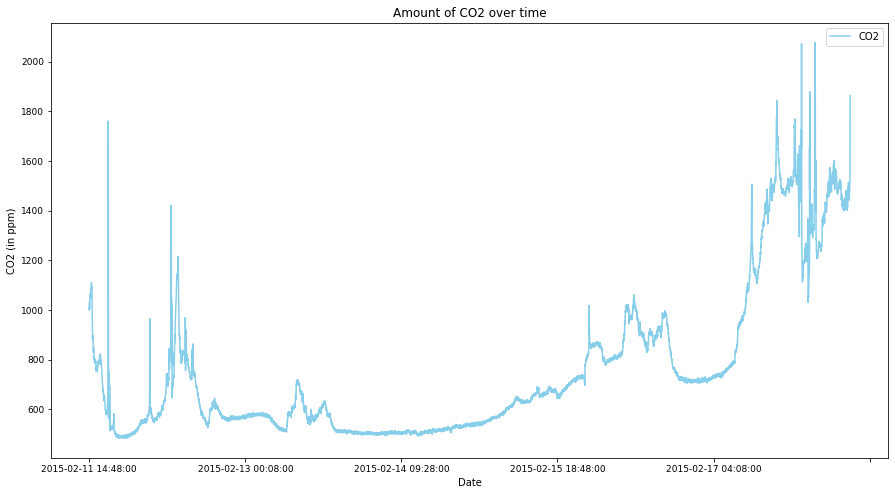

In [145]:
# Create a lineplot to visualize amount of CO2 per date

data.plot(x = 'date', y = 'CO2',             # Specifying variabes on the axis
          figsize = (15,8),                  # Setting a Figure object size as a tuple
          fontsize = 9,                      # Setting axis font size 
          color = 'skyblue',                 # Setting a color
          title = 'Amount of CO2 over time', # Setting a title of a plot 
          xlabel = 'Date',                   # Setting x-axis label
          ylabel = 'CO2 (in ppm)');          # Setting y-axis label

The line plot is showing a trend of CO2 amount over a period of time from 12.02.2015 (Thursday) till 18.02.2015 (Wednesday). The graph displays how the amount of CO2 has decreased during the weekend (14.02.2015 - 15.02.2015). 

## 3.2 Plot kinds

One of the `.plot()` function´s parameters is `kind`, using which you can set certain plot styles. You simply assign the selected plot as a string to this parameter. You can also create each plot kind using a corresponding function applied on the DataFrame. For example:

```DataFrame.plot(kind = 'hist')``` = ```DataFrame.hist()```

### 3.2.1 Histogram


Histogram is a handy plot to get a picture of the spread of data points. It creates so-called bins that you can think of as particular ranges of values. Each data point falls into the respective bin according to its value and the number of data points are counted. 

Look at some statistics computed on variable Humidity. We know the lowest and the highest temperature, average temperature, and that 50% of values are under 30,2°C, etc. But it´s hard to imagine how the distribution of 9752 observations looks like based these summary statistics.

In [33]:
# Take a look at the descriptive statistics using .describe()
data.Humidity.describe()

count    9752.000000
mean       29.891910
std         3.952844
min        21.865000
25%        26.642083
50%        30.200000
75%        32.700000
max        39.500000
Name: Humidity, dtype: float64

Let´s create a histogram of variable Humidity. You can use `.plot()` method and specify `kind = "hist"` within this method. 

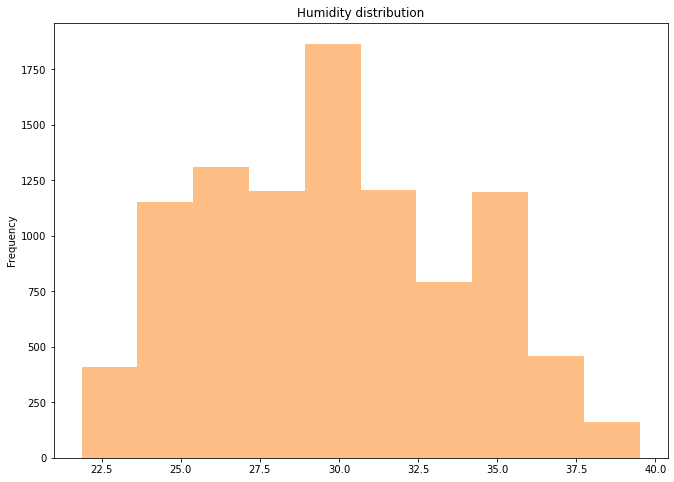

In [149]:
# Plot the relative humidity distribution
data['Humidity'].plot(kind ='hist',
                      figsize = (11,8),
                      color = '#ff7f0e',
                      alpha = .5,
                      title = 'Humidity distribution');

Now we can see all of 9752 data points plotted in the one graph. In the resulting graph we can see how the values are spread accros range from about 21% to 39% of relative humidity. Most data points lies between 23% and 32,5% with the peak of 30%. 


Be default, this method separate all of the records into 10 bins based on their values. To verify whether our resulting graph accurately reflects the underlying data we should have some funa and try to use different number of bins. Using different number of bins, the visual appearance of the histogram will be changing.

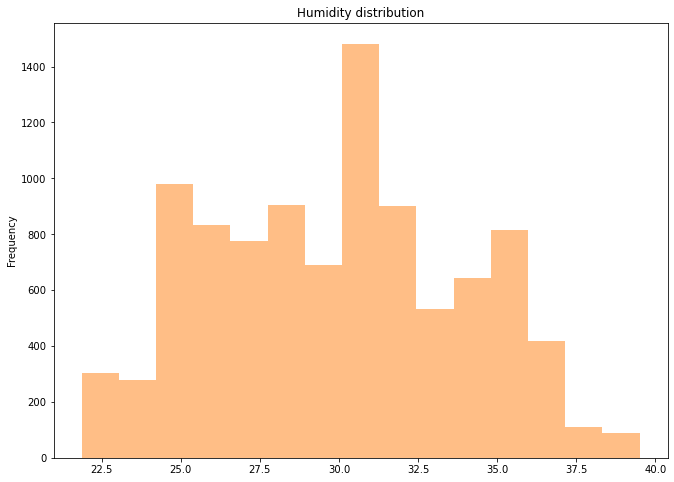

In [160]:
# TASK 2 >>> Create a histogram of 'Humidity' in the same way as above
#        >>> Try yourself to change the number of bins and observe the output 
data['Humidity'].plot(kind ='hist',
                      figsize = (11,8),
                      bins = 15,
                      color = '#ff7f0e',
                      alpha = .5,
                      title = 'Humidity distribution');

Instead of specifying `kind` parameter within `.plot()` method, there is also alternative method that you can use to produce histogram. 

By passing `.hist()` after the DataFrame or Series, we are able to create a histogram of selected column or columns. By default, the axis grid lines are displayed (as you can see in the above example). You can disable showing these lines by setting parameter `grid = False`. All of the optional parameters are available in [the documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html).

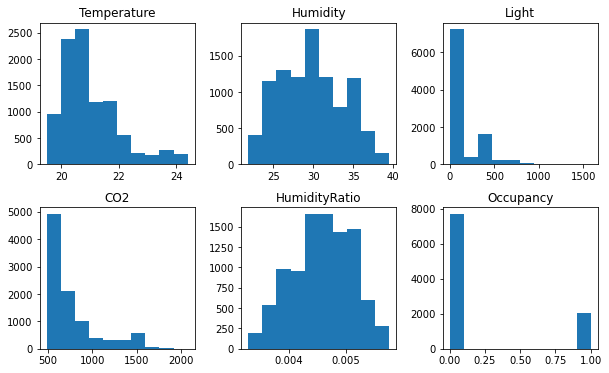

In [176]:
# The data distribution of the whole DataFrame
data.hist(layout = (2,3), grid = False);

### 3.2.2 Boxplot (box-and-whisker plot)

Another approach to visualize the distribution of the data is using boxplots. Moreover, the resulting plot will include [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary): the smallest data point value, the first quartile (1Q), the median (Q2), the third quartile (Q3) and the largest data point value. Boxplots can reveal to us whether there are some possible outliers in the DataFrame and whether the data distribution is skewed or rather symmetrical.

In order to draw a boxplot you can use `.plot()` method with specifying the `kind` keyword argument as 'box'. If we want to customize things such as color, width or style of the line, we can use `boxprops`,`whiskerprops`,`medianprops` and `capprops` parameter.

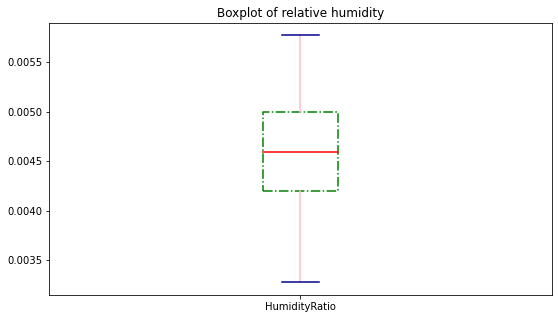

In [201]:
data.HumidityRatio.plot(kind = 'box',
                       figsize = (9,5),
                       boxprops = dict(linewidth = 1.5, color = 'green', linestyle = '-.'),# Customizing the box
                       whiskerprops = dict(linewidth = 1.5, color = 'pink'),               # Customizing the whiskers
                       medianprops = dict(linewidth = 1.5, color = 'red'),                 # Customizing median line
                       capprops = dict(linewidth = 1.5, color = 'darkblue'),               # Customizing caps on the whiskers
                       title = 'Boxplot of relative humidity');

This boxplot illustrates how the values of humidity ratio are spread out. Based on the shape it seems that distribution is rather symetrical and also there are no extreme values, e.g. outliers. The actual box represent 50% of records along with the median value that is displayed as a red line. You can return actual values (of quartiles/percentiles) using `quantile` function.

In [39]:
# Compute 25th percentile, median value and 75th percentile of HumidityRatio variable
perc_25, median, perc_75 = data.HumidityRatio.quantile([.25,.5,.75])

In [40]:
# Print the output
perc_25, median, perc_75

(0.0041963071740118, 0.0045933097710052755, 0.0049979656569512695)




The alternative is to use `pandas` built-in method `DataFrame.boxplot()` that allows you to set several parameters. Please, see [the documentation](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.boxplot.html).

As the boxplots are really usefull when comparing two or more groups, we´ll look at the amount of carbon dioxide according to  person´s presence. Selecting groups you´d like to compare can be done using `by` parameter with the respective variable. We won´t disable axis grid lines to better see a spread of data we´ll only adjust the Figure size. 

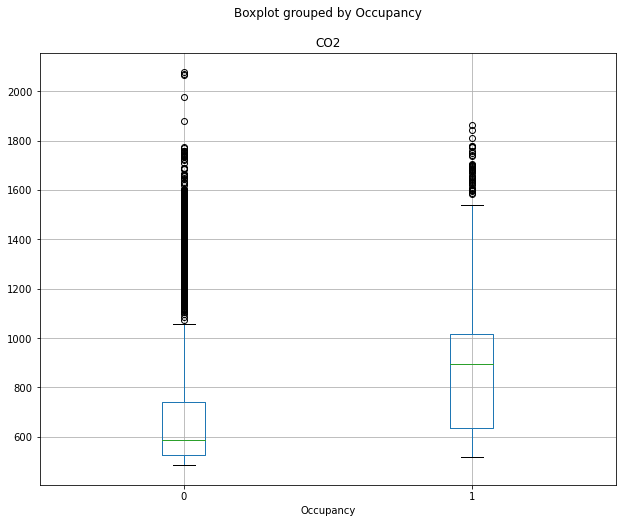

In [178]:
# TASK 3 >>>
data.boxplot(figsize = (10,8),
             column = 'CO2', 
             by = 'Occupancy');

For the further visualizations we´ll use data related to habits of individuals in terms of eating habits, transportation and devices they use and attributes of physical condition and appearance. 


https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

In [43]:
# Read the data
data_ob = pd.read_csv('Datasets/obesity_data.csv')

In [44]:
# Take a look at the data
data_ob

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [45]:
data_ob.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [46]:
#data_ob.FAF = data_ob.FAF.astype('int')

**Variables explanation**

The first 5 variables involves some basic information about individuals along with the information about presence of overweight in a family.

- Gender: the gender
- Age: the age o
- Height: the height 
- Weight: the weight 
- family_history_with_overweight: family member who is/was overweight

Variables related to eating habits:

- FAVC: whether an individual consumes high caloric food frequently
- FCVC: how frequently is vegetables used in main meals
- NCP: the number of main meals per day
- CAEC: consuming any food between main meals
- SMOKE: smoking
- CH2O: consumption of water per day

Variables related to physical condition:
- SCC: calories intake tracking
- FAF: physical activity frequency
- TUE: usage of technological devices per day
- CALC: alcohol consumption
- MTRANS: type of transportation

The last variable 'NObeyesdad' was created using equation for BMI (Body Mass Index) for each individual. Resulting values were compared with the data provided by WHO (World Health Organization) and the Mexican Normativity. 

Resulting labels:

-Underweight (< 18.5)   
-Normal (18.5 - 24.9)   
-Overweight (25 - 29.9)  
-Obesity I (30 - 34.9)  
-Obesity II (35 - 39)  
-Obesity III (> 40)  

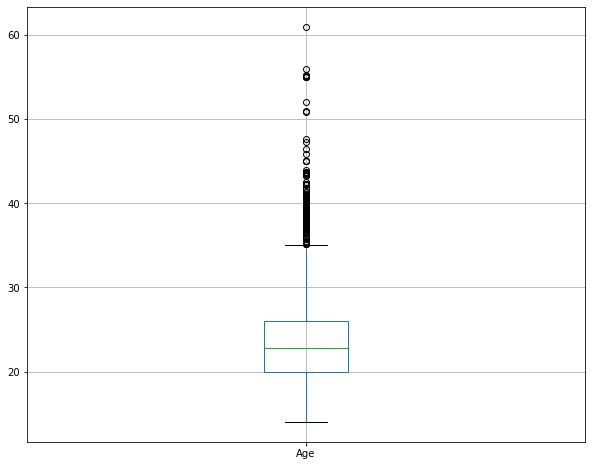

In [47]:
# TASK 4 >>> Create a boxplot of 'Age' variable
#        >>> Set the size of a plot to (10,8)
data_ob.boxplot(column = 'Age',
                figsize = (10,8));

> What can you say about the distribution of ages? How many years old are the majority of people ? Is the distribution symmetrical or are there people who are older compared to the majority?

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

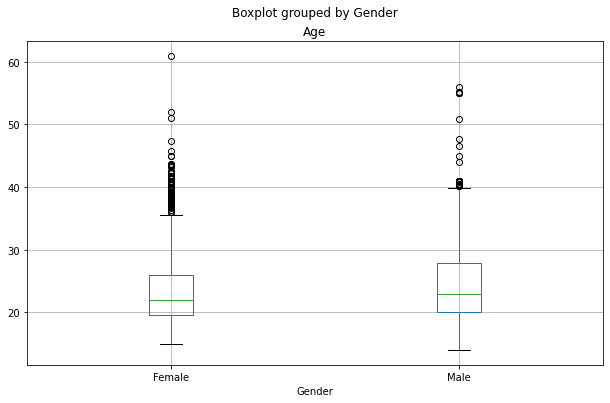

In [209]:
# TASK 5 >>> Create boxplots of 'Age' by gender
#        >>> Compare the ranges of values for male and female: Is the distribution similar or is there some difference? 
#            Do you see any outliers? 
data_ob.boxplot(column = 'Age', by = 'Gender')

The question we might ask regarding obesity levels could be: 'Which individuals are more likely to be obese based on their age?' or 'Are younger adults overweight?'.

Firstly, let´s look how many levels are there. We call `.value_counts()` function on 'Nobeyesdad' variable and sort categories based on their values.

In [49]:
data_ob.NObeyesdad.value_counts().sort_values()

Insufficient_Weight    272
Normal_Weight          287
Overweight_Level_II    290
Overweight_Level_I     290
Obesity_Type_II        297
Obesity_Type_III       324
Obesity_Type_I         351
Name: NObeyesdad, dtype: int64

**Description**

In [50]:
# Creating categorical order
obesity_levels = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

In [51]:
# Creating categorical Data type
ob_level = pd.api.types.CategoricalDtype(ordered = True, categories = obesity_levels)

In [52]:
# Converting 'NObeyesdad' to created categorical Data type
data_ob.NObeyesdad = data_ob.NObeyesdad.astype(ob_level)

We can plot obesity levels to see how these vary according to age of individuals. To avoid overlapping label names of these categories, you can set the rotation of labels to 45 degree with `rot` parameter. Also disabling grid lines can help visualization to be more comprendious.

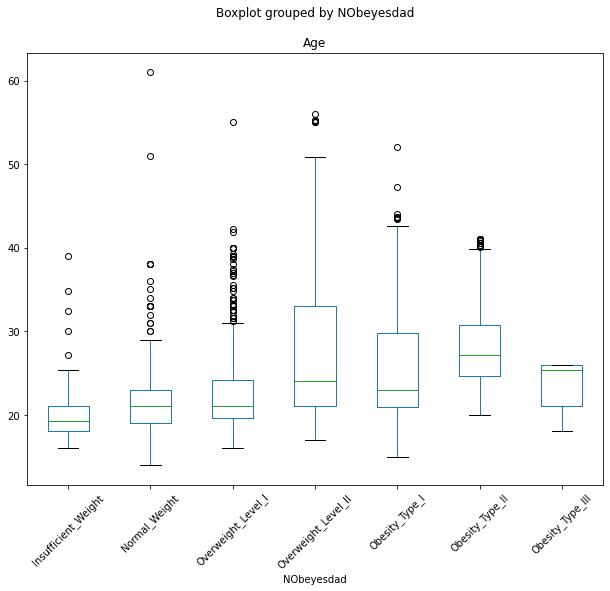

In [53]:
# TASK 5 >>> Create a boxplot of column 'Age' by 'NObeyesdad'
#        >>> Set labels on x-axis to 45 uing rot parameter
#        >>> Disable grid line
data_ob.boxplot(figsize = (10,8),
                column = 'Age', by = 'NObeyesdad',
                rot = 45, grid = False);

> Looking at the created plot, can you see some pattern? At what ages people tend to suffer from some kind of obesity level? 

## Bar plot (Bar chart)

A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

In [54]:
# Example data
sample_data = pd.DataFrame({'Student': ['Thomas','Margaret','Lisa','John','Elis'],
                           'Score': [78,50,68,83,99]})
sample_data

,Student,Score
0,Thomas,78
1,Margaret,50
2,Lisa,68
3,John,83
4,Elis,99


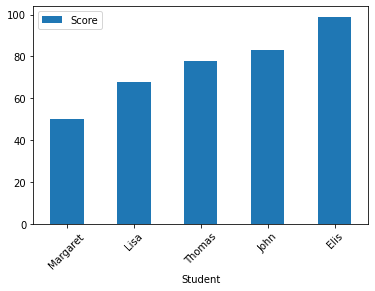

In [55]:
# Creating a barplot of students by their score
sample_data.sort_values(by = 'Score').plot(x = 'Student', y = 'Score',
                                           kind = 'bar', rot = 45);

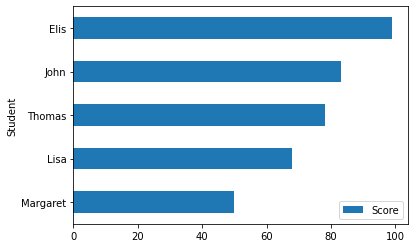

In [56]:
# Horizontal barplot
sample_data.sort_values(by = 'Score').plot(x = 'Student', y = 'Score',
                                           kind = 'barh', rot = 0);

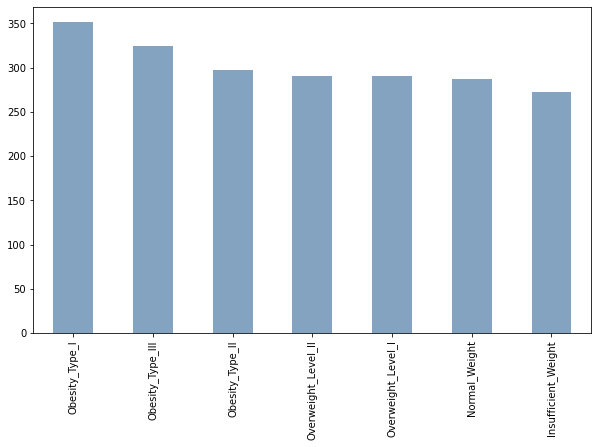

In [217]:
# TASK >>>
data_ob.NObeyesdad.value_counts().plot(kind = 'bar', color = ((0.2, 0.4, 0.6, 0.6)));

Let´s say we´d like to see usage of transportation by individuals. To visualize them we simply count data points and apply plot function to that.

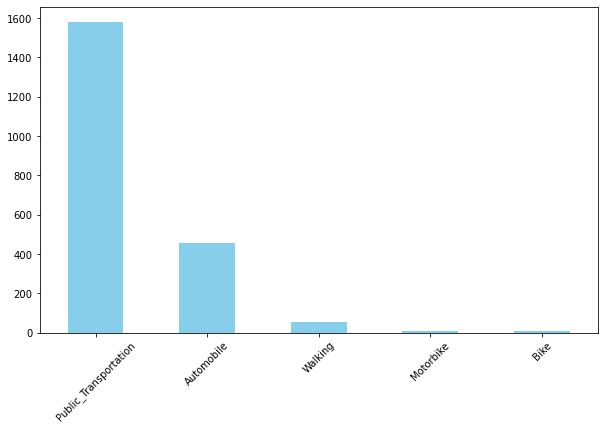

In [213]:
# TASK >>> 
data_ob.MTRANS.value_counts().plot(kind='bar', rot = 45, color = 'skyblue');

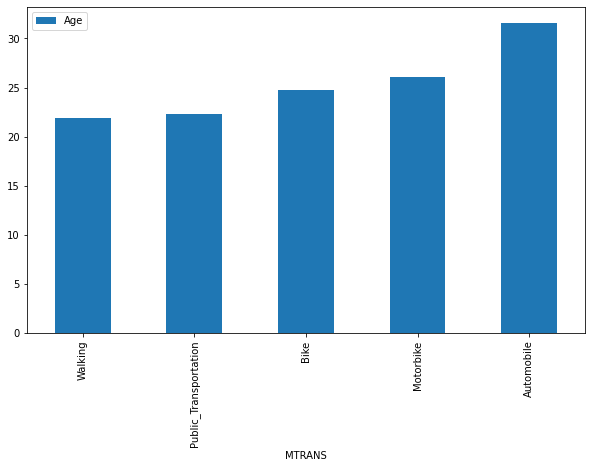

In [219]:
# TASK >>>
# average age - transportation
gender_ob = (pd.DataFrame(data_ob.groupby('MTRANS').Age.mean().sort_values()))
gender_ob.plot(kind='bar');

In [224]:
# TASK >>> Histogram of Weight based on the gender
#      >>> Set the number of bins to 15

**Description**

In [60]:
data_ob.NCP.value_counts()

3.000000    1203
1.000000     199
4.000000      69
3.985442       2
1.104642       2
            ... 
2.658837       1
1.240424       1
2.057935       1
2.337035       1
2.434347       1
Name: NCP, Length: 635, dtype: int64

In [61]:
def meals_per_day(row):
    if row['NCP'] > 3:
        return 'More than 3 meals'
    elif row['NCP'] == 3:
        return '3 meals'
    else:
        return 'between 1 and 2 meals'

In [62]:
data_ob['meals_per_day'] = data_ob.apply(meals_per_day, axis = 1)

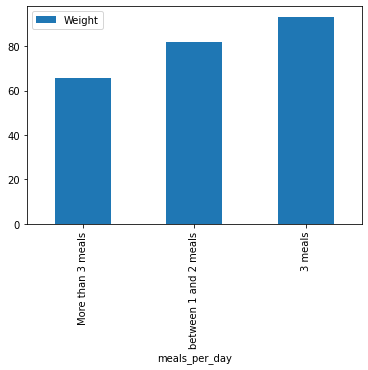

In [63]:
data_meal = pd.DataFrame(data_ob.groupby('meals_per_day').Weight.mean().sort_values())
data_meal.plot(kind='bar');

**Description**

### Citation request:
Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, VÃ©ronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.

Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.

